# 2024 California Power Sector Emissions
**An Analysis**

#### Author: Paul Junver Soriano

#### Date: March 13, 2025 *(Last Updated)*

## SUBMISSION 1: Proposal
---

## Background

The data is collected by the U.S. Environmental Protection Agency (EPA) Clean Air Markets Division (CAMD). 

The data is made available to the public as part of the agency's regulations for energy generating units (EGUs) to measure and report their emissions. EGUs must also assess their facilities, operations and must perform quality assurance on the data that they collect.

The data used for this analysis is only a subset (for the year 2024, for the state of California) of the general data. As a resident of California, I am interested in learning how EGUs in the state operate and comply to standards set by the EPA. 

Furthermore, the California Green Energy Initiative aims for electric utilities to acquire at least 50% of their electricity from renewable resources by 2030. By analyzing this data, I hope that I can gain some insights on how some of our facilities are working towards this goal.

#### References
* United States Environmental Protection Agency (EPA). “Power Sector Data.” Washington, DC: Office of Atmospheric Protection, Clean Air and Power Division. Available from EPA’s Clean Air Markets Program Data website: https://campd.epa.gov.

* United States Environmental Protection Agency (EPA). “Power Sector Emissions Data Guide.” Washington, DC: Office of Atmospheric Protection, Clean Air and Power Division. Available from EPA’s Clean Air Markets Program Data website: https://campd.epa.gov.

* Megerian, Chris; Panzar, Javier (October 7, 2015). "Gov. Brown signs climate change bill to spur renewable energy, efficiency standards". *Los Angeles Times.* Retrieved March 12, 2025. https://www.latimes.com/politics/la-pol-sac-jerry-brown-climate-change-renewable-energy-20151007-story.html.

## Objective

Some questions that I hope to answer from the data:
1. Which facility in California had the most emissions?
2. Which facility was the most efficient? Which unit type is the most efficient?
3. How much of the facilities still rely on natural gas as primary source of fuel? Does the presence of a secondary fuel source reduce emissions?
4. What gas or gases were emitted the most?

## Data

### Dataset

The 2024 California Power Sector Emissions dataset consists of 240 observations, with each observation representing the annual report for each EGU facility and unit. The following data were collected for each observation:


|    | variable                      | type                | description                                 |   
|:--:| :--------                     | :-----:             | :------------                               |
|  1 | `State`                       | categorical         | the state (CA)                              |
|  2 | `Facility Name`               | categorical         | the name of the facility                    |
|  3 | `Facility ID`                 | numeric, discrete   | the ID of the facility                      |
|  4 | `Unit ID`                     | numeric, discrete   | the ID of the unit                          |
|  5 | `Associated Stacks`           | categorical         | smokestacks associated with the unit        |
|  6 | `Year`                        | numeric, discrete   | the year (2024)                             |
|  7 | `Operating Time Count`        | numeric, discrete   | total hours of facility operation (inc. start up and shut down) |
|  8 | `Sum of the Operating Time`   | numeric, continuous | total hours of electricity-generation operation                    |
|  9 | `Gross Load (MWh)`            | numeric, continuous | amount of electricity produced (in MWh)     |
| 10 | `Steam Load (1000lb)`         | numeric, continuous | amount of steam produced (in 1000lb/hr)     |
| 11 | `SO2 Mass (short tons)`       | numeric, continuous | amount of SO2 emitted (in short tons)       |
| 12 | `SO2 Rate (lbs/mmBtu)`        | numeric, continuous | rate of SO2 emission (in lbs/mmBtu)         |
| 13 | `CO2 Mass (short tons)`       | numeric, continuous | amount C02 emitted (in short tons)          |
| 14 | `CO2 Rate (short tons/mmBtu)` | numeric, continuous | rate of C02 emission (in short tons/mmBtu)  |
| 15 | `NOx Mass (short tons)`       | numeric, continuous | amount NOx emitted (in short tons)          |
| 16 | `NOx Rate (lbs/mmBtu)`        | numeric, continuous | rate of NOx emission (in lbs/mmBtu)         |
| 17 | `Heat Input (mmBtu)`          | numeric, continuous | amount of heat input from burning fuel (in mmBtu)|
| 18 | `Primary Fuel Type`           | categorical         | primary fuel used                           |
| 19 | `Secondary Fuel Type`         | categorical         | secondary fuel used (if available)          |
| 20 | `Unit Type`                   | categorical         | type of unit (turbine, boiler, etc.)        |
| 21 | `SO2 Controls`                | categorical         | SO2 control device(s) used (if available)   |
| 22 | `NOx Controls`                | categorical         | NOx control device(s) used (if available)   |
| 23 | `PM Controls`                 | categorical         | PM control device(s) used (if available)    |
| 24 | `Hg Controls`                 | categorical         | Hg control device(s) used (if available)    |
| 25 | `Program Code`                | categorical         | emission control program used               |

> *Notes:*
> * mmBtu: metric million British thermal unit, used to measure heat
> * SO2: Sulfur Dioxide
> * CO2: Carbon Dioxide
> * NOx: Nitrogen Oxides (both NO and NO2)
> * PM: Particulate Matter (solid particles in the air)
> * Hg: Mercury
> * `Program Code` codes can be found in [this guide](https://www.epa.gov/system/files/documents/2022-07/CAMD%27s%20Power%20Sector%20Emissions%20Data%20Guide%20-%2007182022.pdf)

### Data Overview

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data
df = pd.read_csv('annual-emissions-2024-ca.csv')

In [3]:
# Check what the data looks like
df.head()

,State,Facility Name,Facility ID,Unit ID,Associated Stacks,Year,Operating Time Count,Sum of the Operating Time,Gross Load (MWh),Steam Load (1000 lb),...,NOx Rate (lbs/mmBtu),Heat Input (mmBtu),Primary Fuel Type,Secondary Fuel Type,Unit Type,SO2 Controls,NOx Controls,PM Controls,Hg Controls,Program Code
0,CA,Moss Landing Power Plant,260,1A,NaN,2024,4926,4632.36,1057993.53,NaN,...,0.0203,7656029.272,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
1,CA,Moss Landing Power Plant,260,2A,NaN,2024,4553,4254.06,988453.85,NaN,...,0.0202,7096048.495,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
2,CA,Moss Landing Power Plant,260,3A,NaN,2024,5290,4958.61,1113582.95,NaN,...,0.0186,8092235.611,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
3,CA,Moss Landing Power Plant,260,4A,NaN,2024,4433,4123.27,952838.89,NaN,...,0.0211,6780931.376,Pipeline Natural Gas,NaN,Combined cycle,NaN,Dry Low NOx Burners|Selective Catalytic Reduction,NaN,NaN,ARP
4,CA,Cabrillo Power I Encina Power Station,302,10,NaN,2024,673,486.90,32986.10,NaN,...,0.0177,321746.779,Pipeline Natural Gas,NaN,Combustion turbine,NaN,Water Injection|Selective Catalytic Reduction,NaN,NaN,ARP


In [4]:
# Check data shape
df.shape

(240, 25)

In [5]:
# Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   State                        240 non-null    object 
 1   Facility Name                240 non-null    object 
 2   Facility ID                  240 non-null    int64  
 3   Unit ID                      240 non-null    object 
 4   Associated Stacks            2 non-null      object 
 5   Year                         240 non-null    int64  
 6   Operating Time Count         240 non-null    int64  
 7   Sum of the Operating Time    240 non-null    float64
 8   Gross Load (MWh)             233 non-null    float64
 9   Steam Load (1000 lb)         0 non-null      float64
 10  SO2 Mass (short tons)        236 non-null    float64
 11  SO2 Rate (lbs/mmBtu)         236 non-null    float64
 12  CO2 Mass (short tons)        236 non-null    float64
 13  CO2 Rate (short tons

> **Important Observations:**
    > * `Steam Load` column is all null; all facilities listed in California under the EPA's programs do not generate steam for electricity.
    > * `Hg Controls` columns is all null; none of the facilities have control devices for mercury.

### Data Cleaning

#### Cleaning the columns

In [6]:
# From the observations gained from df.info(), we can drop the Steam Load and Hg Controls columns
clean_df = df.drop(['Steam Load (1000 lb)', 'Hg Controls'], axis = 1)
clean_df.columns.to_list()

['State',
 'Facility Name',
 'Facility ID',
 'Unit ID',
 'Associated Stacks',
 'Year',
 'Operating Time Count',
 'Sum of the Operating Time',
 'Gross Load (MWh)',
 'SO2 Mass (short tons)',
 'SO2 Rate (lbs/mmBtu)',
 'CO2 Mass (short tons)',
 'CO2 Rate (short tons/mmBtu)',
 'NOx Mass (short tons)',
 'NOx Rate (lbs/mmBtu)',
 'Heat Input (mmBtu)',
 'Primary Fuel Type',
 'Secondary Fuel Type',
 'Unit Type',
 'SO2 Controls',
 'NOx Controls',
 'PM Controls',
 'Program Code']

In [7]:
# Since this dataset is for the year 2024 and for the state of California, those columns can be dropped.
clean_df = clean_df.drop(['Year', 'State'], axis=1)
print(f"# of cols before: {len(df.columns)} \n # of cols after: {len(clean_df.columns)}")

# of cols before: 25 
 # of cols after: 21


In [8]:
# Remove units in column names, rename some columns for better readability and usability
column_names = {
    'Operating Time Count':'Total Operation Time',  # the time in hours the facility was open (with start up and shut down)
    'Sum of the Operating Time':'Total Production Time', # the time in hours the facility was running/producing electricity
    'Gross Load (MWh)':'Gross Load',
    'Steam Load (1000 lb)':'Steam Load',
    'SO2 Mass (short tons)':'SO2 Mass',
    'SO2 Rate (lbs/mmBtu)':'SO2 Rate',
    'CO2 Mass (short tons)':'CO2 Mass',
    'CO2 Rate (short tons/mmBtu)':'CO2 Rate',
    'NOx Mass (short tons)':'NOx Mass',
    'NOx Rate (lbs/mmBtu)':'NOx Rate',
    'Heat Input (mmBtu)':'Heat Input'
}
clean_df = clean_df.rename(columns=column_names)
clean_df.columns.to_list()

['Facility Name',
 'Facility ID',
 'Unit ID',
 'Associated Stacks',
 'Total Operation Time',
 'Total Production Time',
 'Gross Load',
 'SO2 Mass',
 'SO2 Rate',
 'CO2 Mass',
 'CO2 Rate',
 'NOx Mass',
 'NOx Rate',
 'Heat Input',
 'Primary Fuel Type',
 'Secondary Fuel Type',
 'Unit Type',
 'SO2 Controls',
 'NOx Controls',
 'PM Controls',
 'Program Code']

In [9]:
# Reordering columns
new_cols = ['Facility Name',
            'Facility ID',
            'Unit ID',
            'Unit Type',
            'Total Operation Time',
            'Total Production Time',
            'Gross Load',
            'Heat Input',
            'SO2 Mass',
            'SO2 Rate',
            'CO2 Mass',
            'CO2 Rate',
            'NOx Mass',
            'NOx Rate',
            'Primary Fuel Type',
            'Secondary Fuel Type',
            'SO2 Controls',
            'NOx Controls',
            'PM Controls',
            'Associated Stacks',
            'Program Code']
clean_df = clean_df[new_cols]
clean_df.loc[1]

Facility Name                                     Moss Landing Power Plant
Facility ID                                                            260
Unit ID                                                                 2A
Unit Type                                                   Combined cycle
Total Operation Time                                                  4553
Total Production Time                                              4254.06
Gross Load                                                       988453.85
Heat Input                                                     7096048.495
SO2 Mass                                                             2.129
SO2 Rate                                                             0.001
CO2 Mass                                                        394504.585
CO2 Rate                                                             0.065
NOx Mass                                                            37.462
NOx Rate                 

#### Data quality check

In [10]:
# Check for duplicates
duplicates = clean_df.duplicated()
duplicates.value_counts()

False    240
Name: count, dtype: int64

> No duplicates in the data

In [11]:
# Check for other null values
clean_df.isna().sum()

Facility Name              0
Facility ID                0
Unit ID                    0
Unit Type                  0
Total Operation Time       0
Total Production Time      0
Gross Load                 7
Heat Input                 4
SO2 Mass                   4
SO2 Rate                   4
CO2 Mass                   4
CO2 Rate                   4
NOx Mass                   4
NOx Rate                   4
Primary Fuel Type          0
Secondary Fuel Type      219
SO2 Controls             239
NOx Controls               7
PM Controls              239
Associated Stacks        238
Program Code               0
dtype: int64

In [12]:
clean_df[clean_df['Gross Load'].isna()]

,Facility Name,Facility ID,Unit ID,Unit Type,Total Operation Time,Total Production Time,Gross Load,Heat Input,SO2 Mass,SO2 Rate,...,CO2 Rate,NOx Mass,NOx Rate,Primary Fuel Type,Secondary Fuel Type,SO2 Controls,NOx Controls,PM Controls,Associated Stacks,Program Code
61,Glenarm,422,GT5,Combined cycle,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Pipeline Natural Gas,NaN,NaN,Water Injection|Selective Catalytic Reduction,NaN,NaN,ARP
62,Olive,6013,01,Dry bottom wall-fired boiler,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Pipeline Natural Gas,NaN,NaN,Low NOx Burner Technology (Dry Bottom only)|Se...,NaN,NaN,ARP
63,Olive,6013,02,Dry bottom wall-fired boiler,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Pipeline Natural Gas,NaN,NaN,Combustion Modification/Fuel Reburning|Selecti...,NaN,NaN,ARP
208,Ivanpah 2,57073,BLR1,Other boiler,6447,6447.0,NaN,454677.8,0.098,0.0002,...,0.0584,2.489,0.0105,Pipeline Natural Gas,NaN,NaN,NaN,NaN,NaN,ARP
209,Ivanpah 1,57074,BLR1,Other boiler,5103,5103.0,NaN,374094.7,0.084,0.0002,...,0.0592,2.055,0.0108,Pipeline Natural Gas,NaN,NaN,NaN,NaN,NaN,ARP
210,Ivanpah 3,57075,BLR1,Other boiler,7309,7309.0,NaN,449552.0,0.092,0.0002,...,0.0587,2.469,0.0108,Pipeline Natural Gas,NaN,NaN,NaN,NaN,NaN,ARP
217,"Sentinel Energy Center, LLC",57482,3,Combustion turbine,0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Pipeline Natural Gas,NaN,NaN,Water Injection|Selective Catalytic Reduction,NaN,NaN,ARP


> Some facilities and units did not report their gross load of electricity produced.
> * Observations with no gross load but has other measurements can still be used for other analyses.
> * Indices of observations with no gross load and other measurements: [61, 62, 63, 217]

In [13]:
no_reports = [61, 62, 63, 217]
clean_df = clean_df.drop(no_reports)

In [14]:
# Recheck for null values
clean_df.isna().sum()

Facility Name              0
Facility ID                0
Unit ID                    0
Unit Type                  0
Total Operation Time       0
Total Production Time      0
Gross Load                 3
Heat Input                 0
SO2 Mass                   0
SO2 Rate                   0
CO2 Mass                   0
CO2 Rate                   0
NOx Mass                   0
NOx Rate                   0
Primary Fuel Type          0
Secondary Fuel Type      215
SO2 Controls             235
NOx Controls               7
PM Controls              235
Associated Stacks        234
Program Code               0
dtype: int64

#### Changing data types

In [15]:
clean_df['Unit Type'].value_counts()

Unit Type
Combustion turbine              131
Combined cycle                   90
Dry bottom wall-fired boiler      9
Other boiler                      3
Tangentially-fired                2
Stoker                            1
Name: count, dtype: int64

In [16]:
# Change Unit Type into a categorical type
clean_df['Unit Type'] = df['Unit Type'].astype('category')
clean_df['Unit Type'].cat.categories

Index(['Combined cycle', 'Combustion turbine', 'Dry bottom wall-fired boiler',
       'Other boiler', 'Stoker', 'Tangentially-fired'],
      dtype='object')

In [17]:
# Change Primary Fuel Type into a categorical type
clean_df['Primary Fuel Type'] = df['Primary Fuel Type'].astype('category')
clean_df['Primary Fuel Type'].cat.categories

Index(['Natural Gas', 'Other Gas', 'Pipeline Natural Gas', 'Wood'], dtype='object')

In [18]:
# Change Primary Fuel Type into a categorical type
clean_df['Secondary Fuel Type'] = df['Secondary Fuel Type'].astype('category')
clean_df['Secondary Fuel Type'].cat.categories

Index(['Diesel Oil', 'Other Gas', 'Residual Oil'], dtype='object')

___

#### Data distributions and initial visualizations

In [19]:
# Check dataframe distributions
clean_df.describe()

,Facility ID,Total Operation Time,Total Production Time,Gross Load,Heat Input,SO2 Mass,SO2 Rate,CO2 Mass,CO2 Rate,NOx Mass,NOx Rate
count,236.000000,236.000000,236.000000,2.330000e+02,2.360000e+02,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,36133.809322,2166.199153,2062.834661,3.180573e+05,2.345048e+06,0.705911,0.001093,139726.923377,0.059397,9.353343,0.020652
std,25978.253354,2356.691709,2357.308047,4.932627e+05,3.470220e+06,1.040168,0.001697,206953.102536,0.002984,13.768479,0.020726
min,260.000000,1.000000,1.000000,0.000000e+00,1.332000e+02,0.000000,0.000200,7.800000,0.058000,0.001000,0.001600
25%,418.500000,351.250000,270.582500,1.151914e+04,1.159282e+05,0.035000,0.001000,6867.950750,0.059000,0.815500,0.009700
50%,55511.000000,861.000000,708.575000,4.836199e+04,4.442025e+05,0.126500,0.001000,26291.411000,0.059100,1.875500,0.014850
75%,56298.000000,4092.500000,3885.827500,4.575571e+05,3.554800e+06,1.066500,0.001000,211255.355000,0.059300,14.158750,0.021925
max,60698.000000,8328.000000,8323.190000,1.984036e+06,1.364977e+07,4.095000,0.027000,823774.862000,0.103100,106.832000,0.173700


<Figure size 800x1000 with 0 Axes>

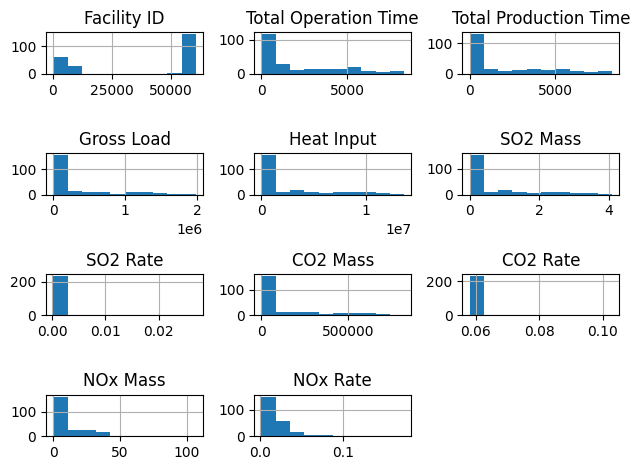

In [20]:
# Visualize distributions
plt.figure(figsize=(8, 10))
clean_df.hist()
plt.tight_layout()
plt.show()

<Axes: >

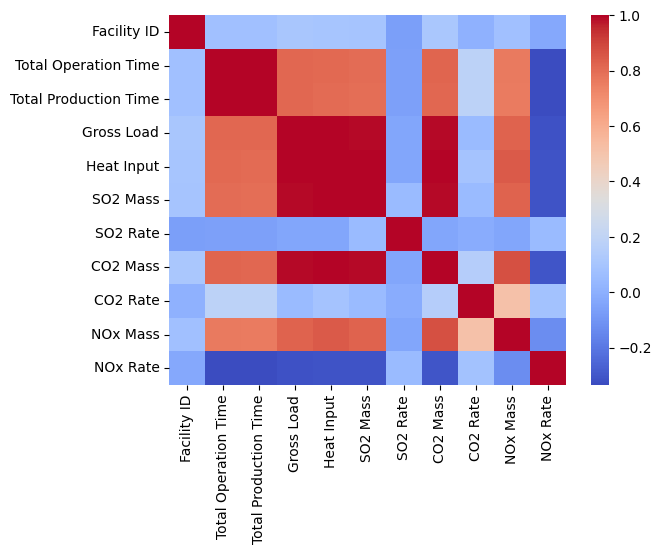

In [21]:
# Check variable correlations (for numeric variables)
sns.heatmap(clean_df.corr(numeric_only=True), cmap='coolwarm')

___
## SUBMISSION 2: Exploratory Data Analysis (EDA)

## SUBMISSION 2: Hypothesis Testing